In [1]:
# config
import init
from singleton_pattern.load_model import get_model
from  singleton_pattern.load_config import get_config,get_non_dnn_method_list
from singleton_pattern.load_dataset_reader import get_train_reader,get_test_reader
from singleton_pattern.load_data_generator import get_train_data_generator,get_test_data_generator
from util.cache import Cache

config_name = 'PhysNet.yaml'
# init
init.run(config_name)

from util.cuda_info import print_info
print_info()
non_dnn_method_list = get_non_dnn_method_list()

config = get_config()
print(f'Method and DataGenerator Name: {config["method"]}')
# print(f'Model:\n------------------\n{model}\n------------------')

CUDA:
---------------------------
PyTorch supports GPU and currently has 1 CUDA devices available.
The current default CUDA device is: NVIDIA GeForce RTX 3090
---------------------------
Method and DataGenerator Name: PhysNet


In [ ]:
model = get_model()
is_need_train = config['method'] not in non_dnn_method_list
train_dataloader = None
# load train dataset
if is_need_train:
    train_reader = get_train_reader()
    print(f'train_reader: {train_reader.loader_name}')
    train_data = train_reader.load_data()
    train_data_generator = get_train_data_generator()
    train_dataloader = train_data_generator.get_tensor_dataloader(train_data)
# load test dataset
test_reader = get_test_reader()
test_data_generator = get_test_data_generator()
print(f'Test Loader: {test_reader.loader_name}')
test_data = test_reader.load_data()
test_dataloader = test_data_generator.get_tensor_dataloader(test_data)

optimizer:Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    eps: 1e-08
    foreach: None
    lr: 0.01
    maximize: False
    weight_decay: 0
)
criterion:PhyNetLoss(
  (neg_pearson_Loss): NegPearsonLoss()
)


Progress:   0%|          | 0/100 [00:00<?, ?it/s]

cache path:cache\MODEL\528a829fe6434e7f4e674d869f2e62e6b0500d9e222416bf3c2863c0aeff8dd8
Epoch [1/100],Train Loss: 0.9968,Test Loss: 1.0195
Epoch [2/100],Train Loss: 0.9999,Test Loss: 0.9936
Epoch [3/100],Train Loss: 1.0003,Test Loss: 0.9833
Epoch [4/100],Train Loss: 1.0059,Test Loss: 0.9983
Epoch [5/100],Train Loss: 1.0013,Test Loss: 0.9991
Epoch [6/100],Train Loss: 1.0008,Test Loss: 0.9996
Epoch [7/100],Train Loss: 1.0014,Test Loss: 1.0021
Epoch [8/100],Train Loss: 0.9987,Test Loss: 1.0058
Epoch [9/100],Train Loss: 0.9956,Test Loss: 1.0078
Epoch [10/100],Train Loss: 0.9632,Test Loss: 1.0214
Epoch [11/100],Train Loss: 0.9874,Test Loss: 1.0064
Epoch [12/100],Train Loss: 0.9971,Test Loss: 0.9963
Epoch [13/100],Train Loss: 0.9961,Test Loss: 1.0020
Epoch [14/100],Train Loss: 0.9490,Test Loss: 0.9961
Epoch [15/100],Train Loss: 0.9855,Test Loss: 1.0208
Epoch [16/100],Train Loss: 0.7156,Test Loss: 1.1171
Epoch [17/100],Train Loss: 0.8177,Test Loss: 0.9853
Epoch [18/100],Train Loss: 0.7058,Tes

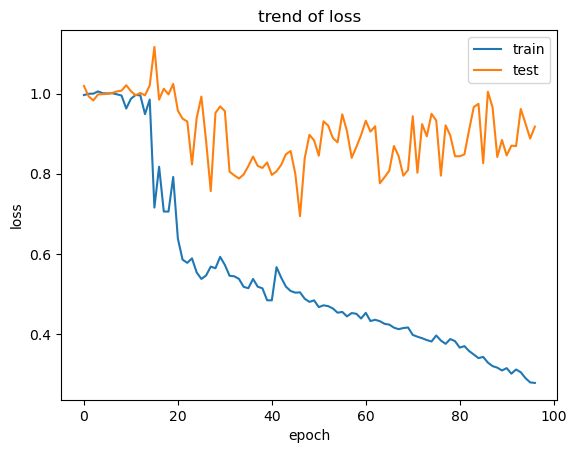

In [ ]:
# if cached and want to second training, set train_twice = True
from util.cache import CacheType


train_twice = False
# train
if is_need_train:
    from util.train_model import run as run_train
    if train_dataloader is None:
        raise Exception('load train dataloader first')
    if train_twice:
        cache_model = Cache(CacheType.MODEL).read_model()
        model.load_state_dict(cache_model.state_dict())
    run_train(model,train_dataloader,test_dataloader)

In [ ]:
# load test model
use_cache_model = True

import matplotlib.pyplot as plt
import numpy as np
if use_cache_model and is_need_train:
    cache_model = Cache('model').read_model()
    model.load_state_dict(cache_model.state_dict())
model.eval()
model.to('cpu')
pass

cache\6d7e853460b1fd9208d4b080524537e8830b79f1d3681abe2ac1ce2dc82b8607\model


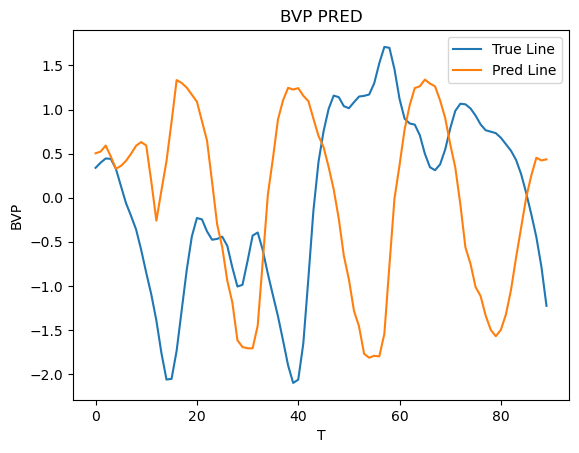

In [ ]:
# output image
i = 0
for batch_X, batch_y in test_dataloader:
    index_n = 7
    if i == index_n:
        plt.title("BVP PRED")
        plt.xlabel("T")
        plt.ylabel("BVP")
        pred = model(batch_X)
        true_data = np.array(batch_y.view(-1).numpy())
        pred_data = np.array(pred.detach().view(-1).numpy())
        true_data = true_data = (true_data - true_data.mean())/true_data.std()
        pred_data = pred_data = (pred_data - pred_data.mean())/pred_data.std()
        plt.plot(true_data, label="True Line")
        plt.plot(pred_data, label="Pred Line")
        plt.legend()
        plt.show()
    if i > index_n:
        break
    i+=1


In [ ]:
try:
    while True:
        pass
except KeyboardInterrupt:
    print("hhh")

hhh
